In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans

In [ ]:
#! pip install pandas plotly scikit-learn matplotlib

In [2]:
train = pd.read_csv('train_ColorHistogram.csv')
test = pd.read_csv('test_ColorHistogram.csv')

## Exploratory Analysis

Aqui vemos que a maior parte das colunas é inútil, pois só tem um valor. 
Vamos descartar essas colunas.

Além disso, vamos usar o violin plot para ver a relação das features com a classe.

Vemos que a V23 e a V2 parecem bem importantes para diferenciar as classes.

Será realizado a normalização dos dados também, pois pode ser importante ao entrar em algoritmos baseados em distância.

In [3]:
util = []
for col in train.columns:
    if len(train[col].unique()) != 1:
        print(col)
        util.append(col)

Unnamed: 0
V2
V23
V44
V65
Class


In [4]:
train1 = train[util[1:-1]]

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(train1)

StandardScaler()

In [7]:
train_scaled = pd.DataFrame(scaler.transform(train1), columns=train1.columns)

array([[<Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V44'}>, <Axes: title={'center': 'V65'}>]],
      dtype=object)

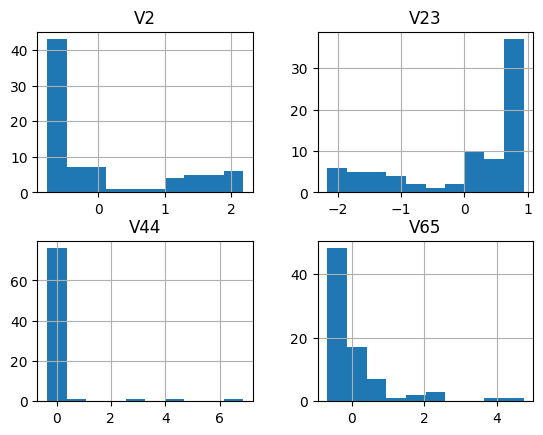

In [8]:
train_scaled.hist()

In [9]:
y = train_scaled.columns[0]
px.violin(train, y=y, x="Class", color="Class", box=True, points="all",
        hover_data=train1.columns)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'customdata': array([[8.10172840e-01, 3.10123457e-02, 4.01975309e-02],
                                   [8.96307692e-01, 7.69230769e-03, 2.09230769e-02],
                                   [9.70152761e-01, 1.02702703e-02, 1.40853897e-02],
                                   [9.80490620e-01, 1.19480519e-02, 7.47474747e-03],
                                   [9.06647727e-01, 1.27272727e-02, 8.06250000e-02],
                                   [9.35344828e-01, 4.23275862e-02, 2.23275862e-02],
                                   [9.89795918e-01, 6.07142857e-03, 4.13265306e-03],
                                   [9.57500000e-01, 1.30555556e-02, 1.47222222e-02],
                                   [8.15833333e-01, 1.05555556e-02, 1.72222222e-02],
                                   [9.03125000e-01, 2.20833333e-02, 2.43750000e-02],
                                   [9.55555556e-01, 1.28395062e-02, 1.58024691e-02],
                                   [9.59285714e-01, 1.45714286e-02, 1.11428571e-02],
                                   [9.36800000e-01, 9.10000000e-03, 1.03000000e-02],
                                   [9.22638889e-01, 1.20833333e-02, 1.76388889e-02],
                                   [9.61259259e-01, 1.56296296e-02, 1.14814815e-02],
                                   [7.31570248e-01, 1.02479339e-02, 5.81818182e-02],
                                   [9.59134615e-01, 9.61538462e-03, 1.50000000e-02],
                                   [8.16545455e-01, 1.80000000e-02, 5.09090909e-02],
                                   [9.73600000e-01, 1.00000000e-02, 1.64000000e-02],
                                   [9.65069444e-01, 7.36111111e-03, 2.59027778e-02],
                                   [2.46400000e-01, 8.00000000e-04, 8.00000000e-04],
                                   [8.36875000e-01, 1.00000000e-02, 4.37500000e-03],
                                   [9.60000000e-01, 1.11111111e-02, 0.00000000e+00],
                                   [7.29428571e-01, 8.00000000e-03, 5.14285714e-03],
                                   [7.98222222e-01, 2.35555556e-02, 7.11111111e-02],
                                   [9.17333333e-01, 8.26666667e-02, 0.00000000e+00],
                                   [4.81618438e-01, 4.97843790e-01, 2.05377721e-02],
                                   [9.50534759e-01, 1.01604278e-02, 3.93048128e-02],
                                   [8.33900000e-01, 2.42000000e-02, 1.41300000e-01],
                                   [9.09533835e-01, 2.69473684e-02, 6.28571429e-02],
                                   [9.84214286e-01, 1.10357143e-02, 4.69642857e-03],
                                   [7.32397661e-01, 2.26003899e-01, 4.15984405e-02],
                                   [9.44000000e-01, 2.69000000e-02, 2.91000000e-02],
                                   [8.15459459e-01, 1.16756757e-02, 0.00000000e+00],
                                   [9.95111111e-01, 2.88888889e-03, 2.00000000e-03],
                                   [9.93250000e-01, 1.75000000e-03, 1.00000000e-03],
                                   [9.83189935e-01, 7.47564935e-03, 7.46753247e-03],
                                   [9.14521739e-01, 5.47826087e-03, 1.50434783e-02],
                                   [7.21066667e-01, 1.49333333e-02, 7.20000000e-02],
                                   [9.35644444e-01, 1.20888889e-02, 2.45333333e-02],
                                   [9.40000000e-01, 4.76190476e-03, 7.38095238e-03],
                                   [9.17272727e-01, 5.45454545e-03, 3.45454545e-03],
                                   [7.77037037e-01, 3.95061728e-03, 9.13580247e-03],
                                   [7.90612245e-01, 1.87755102e-02, 2.85714286e-03],
                                   [8.26574074e-01, 5.64814815e-03, 1.29629630e-03],
                                   [9.37435897e-01, 1.41025641e-02, 3.84615385e-02],
 

In [10]:
y = train_scaled.columns[1]
px.violin(train, y=y, x="Class", color="Class", box=True, points="all",
        hover_data=train1.columns)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'customdata': array([[1.18617284e-01, 3.10123457e-02, 4.01975309e-02],
                                   [7.50769231e-02, 7.69230769e-03, 2.09230769e-02],
                                   [5.49157854e-03, 1.02702703e-02, 1.40853897e-02],
                                   [8.65800866e-05, 1.19480519e-02, 7.47474747e-03],
                                   [0.00000000e+00, 1.27272727e-02, 8.06250000e-02],
                                   [0.00000000e+00, 4.23275862e-02, 2.23275862e-02],
                                   [0.00000000e+00, 6.07142857e-03, 4.13265306e-03],
                                   [1.47222222e-02, 1.30555556e-02, 1.47222222e-02],
                                   [1.56388889e-01, 1.05555556e-02, 1.72222222e-02],
                                   [5.04166667e-02, 2.20833333e-02, 2.43750000e-02],
                                   [1.58024691e-02, 1.28395062e-02, 1.58024691e-02],
                                   [1.50000000e-02, 1.45714286e-02, 1.11428571e-02],
                                   [4.38000000e-02, 9.10000000e-03, 1.03000000e-02],
                                   [4.76388889e-02, 1.20833333e-02, 1.76388889e-02],
                                   [1.16296296e-02, 1.56296296e-02, 1.14814815e-02],
                                   [2.00000000e-01, 1.02479339e-02, 5.81818182e-02],
                                   [1.62500000e-02, 9.61538462e-03, 1.50000000e-02],
                                   [1.14545455e-01, 1.80000000e-02, 5.09090909e-02],
                                   [0.00000000e+00, 1.00000000e-02, 1.64000000e-02],
                                   [1.66666667e-03, 7.36111111e-03, 2.59027778e-02],
                                   [7.52000000e-01, 8.00000000e-04, 8.00000000e-04],
                                   [1.48750000e-01, 1.00000000e-02, 4.37500000e-03],
                                   [2.88888889e-02, 1.11111111e-02, 0.00000000e+00],
                                   [2.57428571e-01, 8.00000000e-03, 5.14285714e-03],
                                   [1.07111111e-01, 2.35555556e-02, 7.11111111e-02],
                                   [0.00000000e+00, 8.26666667e-02, 0.00000000e+00],
                                   [0.00000000e+00, 4.97843790e-01, 2.05377721e-02],
                                   [0.00000000e+00, 1.01604278e-02, 3.93048128e-02],
                                   [6.00000000e-04, 2.42000000e-02, 1.41300000e-01],
                                   [6.61654135e-04, 2.69473684e-02, 6.28571429e-02],
                                   [5.35714286e-05, 1.10357143e-02, 4.69642857e-03],
                                   [0.00000000e+00, 2.26003899e-01, 4.15984405e-02],
                                   [0.00000000e+00, 2.69000000e-02, 2.91000000e-02],
                                   [1.72864865e-01, 1.16756757e-02, 0.00000000e+00],
                                   [0.00000000e+00, 2.88888889e-03, 2.00000000e-03],
                                   [4.00000000e-03, 1.75000000e-03, 1.00000000e-03],
                                   [1.86688312e-03, 7.47564935e-03, 7.46753247e-03],
                                   [6.49565217e-02, 5.47826087e-03, 1.50434783e-02],
                                   [1.92000000e-01, 1.49333333e-02, 7.20000000e-02],
                                   [2.77333333e-02, 1.20888889e-02, 2.45333333e-02],
                                   [4.78571429e-02, 4.76190476e-03, 7.38095238e-03],
                                   [7.38181818e-02, 5.45454545e-03, 3.45454545e-03],
                                   [2.09876543e-01, 3.95061728e-03, 9.13580247e-03],
                                   [1.87755102e-01, 1.87755102e-02, 2.85714286e-03],
                                   [1.66481481e-01, 5.64814815e-03, 1.29629630e-03],
                                   [1.00000000e-02, 1.41025641e-02, 3.84615385e-02],
 

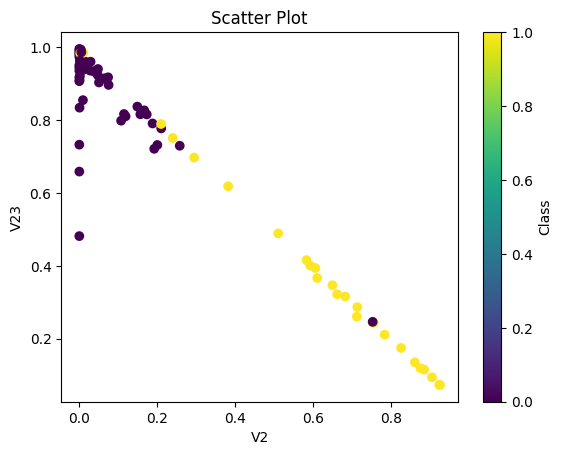

In [11]:
plt.scatter(train['V2'], train['V23'], c=train['Class'])
plt.xlabel('V2')
plt.ylabel('V23')
plt.title('Scatter Plot')
plt.colorbar(label='Class')
plt.show()

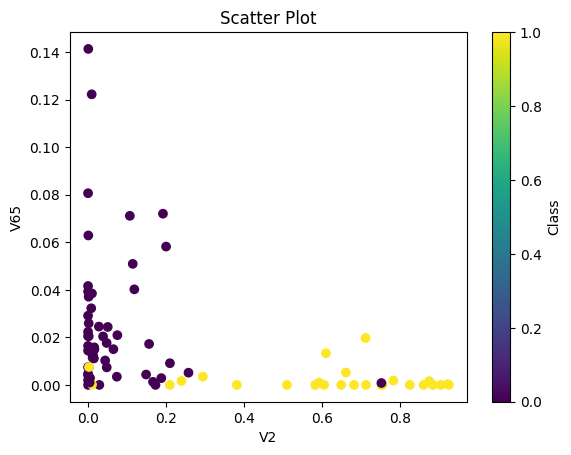

In [12]:
plt.scatter(train['V2'], train['V65'], c=train['Class'])
plt.xlabel('V2')
plt.ylabel('V65')
plt.title('Scatter Plot')
plt.colorbar(label='Class')
plt.show()

## Método de Elbow

Vamos utilizar o método de Elbow para descobrir qual o k ideal para o Kmeans

Para isso, vamos plotar o gráfico da sum_of_squared_distances considerando cada k

Vemos que k = 4 é o ideal, pois a partir daí não parece haver diminuição significativa  dessa soma.

OBS: é importante que os dados estejam normalizados nessa análise.

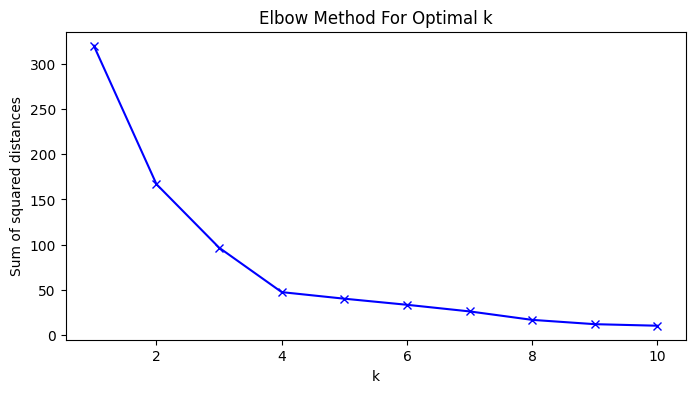

In [13]:
K = range(1,11)
sum_of_squared_distances = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(train_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

plt.show()

## Comparando algoritmos

|  Métrica | Silhueta  | ARI  |
|------------|------------|------------|
| single-linkage | 0.661 | -0.034|
| average-linkage| 0.612 | -0.034|
| complete-linkage| 0.611 | -0.034|
| KMeans| 0.586 | 0.713 |

O coeficiente de silhueta é utilizado para dar uma nota para a clusterização, quanto mais proximo de 1 melhor, ou seja. 

Para isso, ela fornece uma ideia sobre o quão próximo um ponto de dados está ao seu próprio cluster em comparação com os outros clusters

Vemos que a clusterização hierárquica obteve um coeficiente ligeiramente melhor nesse quesito, lendo a single-linkage a melhor.

Já o ARI vai falar quanto o resultado da clusterização está próximo dos labels reais. 

Dessa forma, vemos que o KMeans se sai muito melhor. 

O resultao do algoritmo hierárquico foi muito ruim, pois foi menor que 0, quer dizer que a atribuição aleatória é melhor que a clusterização.


In [14]:
for linkage in ['complete', 'average', 'single']:
    clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage).fit(train_scaled)
    print("Silhueta: ",linkage, silhouette_score(train_scaled, clustering.labels_))
    print("ARI: ",linkage, adjusted_rand_score(train['Class'], clustering.labels_))

Silhueta:  complete 0.6119789360677478
ARI:  complete -0.034459861459351496
Silhueta:  average 0.6119789360677478
ARI:  average -0.034459861459351496
Silhueta:  single 0.6119789360677478
ARI:  single -0.034459861459351496


In [15]:
clustering = KMeans(n_clusters=2).fit(train_scaled)
print("Silhueta: ", "KMeans", silhouette_score(train_scaled, clustering.labels_))
print("ARI: ","KMeans", adjusted_rand_score(train['Class'], clustering.labels_))

Silhueta:  KMeans 0.590344045374349
ARI:  KMeans 0.6686154563484246
